## Statystyczna analiza danych - ćwiczenia

### Projekt zaliczeniowy

Karol Augustowski 182743, grupa 3
IwB, magisterskie, niestacjonarne



### Import bibliotek używanych w projekcie


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Wstęp

Celem projektu jest ukazanie przypadku zastosowania eksploracyjnej analizy danych.
Dane użyte do niniejszej pracy pochodzą ze strony
[Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand).
Analizowany dataset dotyczy rezerwacji pobytu w dwóch hotelach (City Hotel i Resort Hotel).
Obserwacje zawierają między innymi
takie informacje jak długość pobytu, liczbę osób dorosłych, wyprzedzenie rezerwacji
(liczbę dni pomiędzy datą przyjazdu i datą rezerwacji), narodowość gości hotelowych, wybrany plan wyżywienia oraz status rezerwacji.

### 2. Przygotowanie danych

Pierwszym krokiem jest zaimportowanie danych z pliku csv. Dostępne dane zawierają 32 kolumny z danymi.

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

W celu ułatwienia analizy zdecydowano się na pominięcie kolumn zawierających mniej
interesujące dane w celu uproszczenia analizy. Dodatkowo dodano kolumnę zawierającą całkowitą długość pobytu,
wcześniej były wyróżnione liczby dni pobytu w weekendy oraz w czasie tygodnia pracującego.

In [3]:
columns_to_drop = ['assigned_room_type', 'company', 'reserved_room_type', 'deposit_type',
                   'previous_bookings_not_canceled','previous_cancellations','agent',
                   'required_car_parking_spaces', 'total_of_special_requests', 'babies',
                   'days_in_waiting_list', 'deposit_type', 'reservation_status_date','booking_changes']
hotel_df=hotel_df.drop(columns_to_drop, axis=1)
los_column = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']
hotel_df['length_of_stay']=los_column
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_week_number   119390 non-null  int64  
 6   arrival_date_day_of_month  119390 non-null  int64  
 7   stays_in_weekend_nights    119390 non-null  int64  
 8   stays_in_week_nights       119390 non-null  int64  
 9   adults                     119390 non-null  int64  
 10  children                   119386 non-null  float64
 11  meal                       119390 non-null  object 
 12  country                    118902 non-null  object 
 13  market_segment             11

Po powyższych zabiegach zredukowano liczbę kolumn w wybranym zestawie danych z 32 do 20.


Liczba rezerwacji według typu hotelu

Text(0, 0.5, 'Liczba rezerwacji')

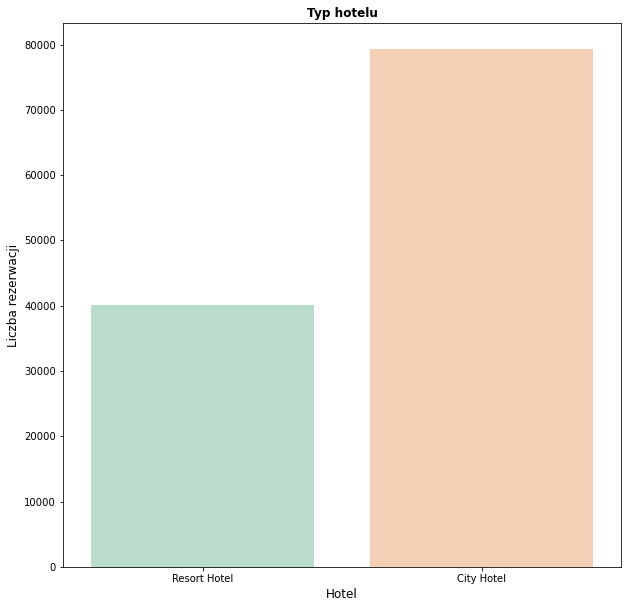

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel_df, palette='Pastel2')
plt.title('Typ hotelu', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Text(0, 0.5, 'Count')

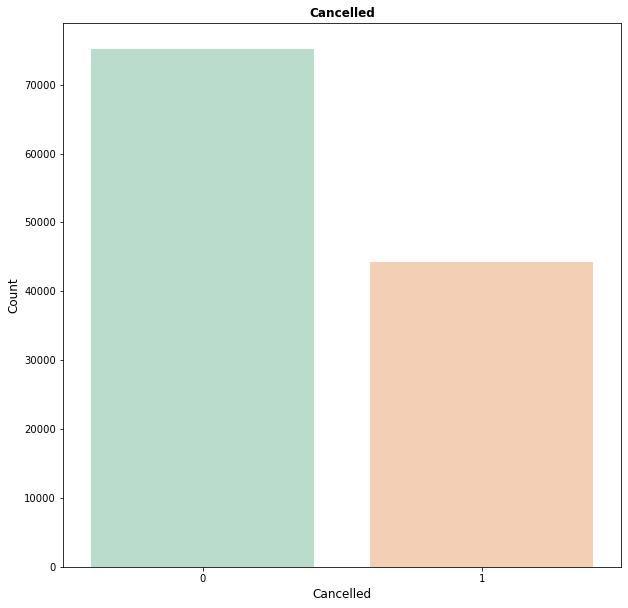

In [5]:
hotel_df['is_canceled'].unique()
plt.figure(figsize=(10,10))
cancelled=sns.countplot(x='is_canceled', data = hotel_df, palette='Pastel2')
plt.title('Cancelled', weight='bold')
plt.xlabel('Cancelled', fontsize=12)
plt.ylabel('Count', fontsize=12)

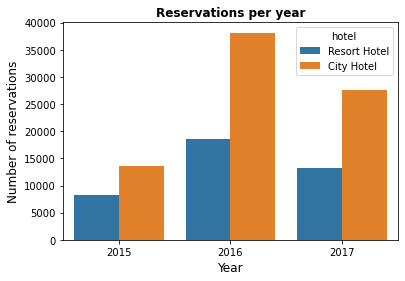

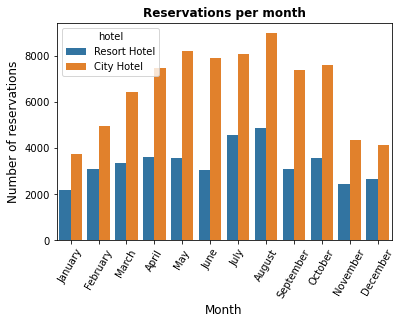

In [6]:
sns.countplot(data=hotel_df,
             x='arrival_date_year', hue='hotel')
plt.title('Reservations per year', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.show()

sns.countplot(data=hotel_df,
              x='arrival_date_month', hue='hotel',
              order=['January', 'February', 'March', 'April', 'May',
                     'June','July','August','September','October', 'November', 'December'])
plt.title('Reservations per month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.xticks(rotation=60)
plt.show()

# sns.countplot(data=hotel_df,
#               x='adr', hue='hotel')
# plt.title('ADR', weight='bold')
# plt.xlabel('ADR', fontsize=12)
# plt.ylabel('Number of reservations', fontsize=12)
# plt.show()

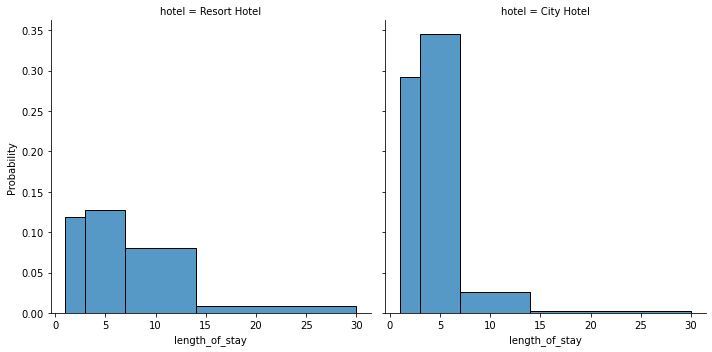

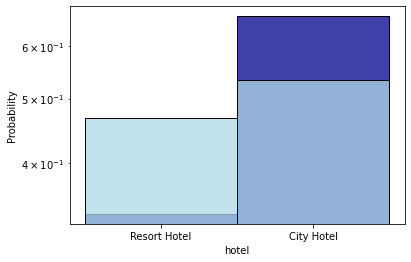

In [7]:
sns.displot(hotel_df,
              x='length_of_stay', col='hotel', bins = [1,3,7,14,30], kind="hist", stat='probability')
plt.show()

hotel_repeated = hotel_df[hotel_df['is_repeated_guest']==1]
# sns.countplot(hotel_df, x='is_repeated_guest', col='hotel', kind="hist", stat='probability')
bar1 = sns.histplot(x="hotel", data=hotel_df, color='darkblue', log_scale=(False, True), stat='probability')
bar2 = sns.histplot(x="hotel", data=hotel_repeated, color='lightblue', log_scale=(False, True), stat='probability')
plt.show()



Text(0, 0.5, 'Count')

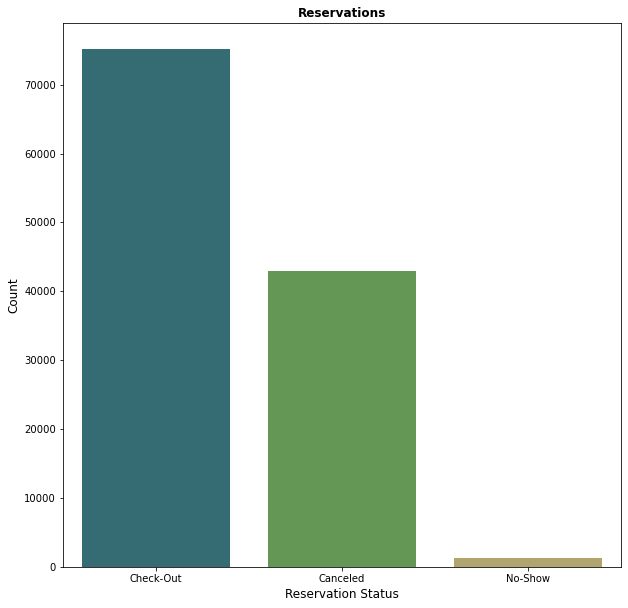

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x='reservation_status', data = hotel_df, palette='gist_earth')
plt.title('Reservations', weight='bold')
plt.xlabel('Reservation Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

Podstawowe statystyki opisowe danych liczbowych

<AxesSubplot:>

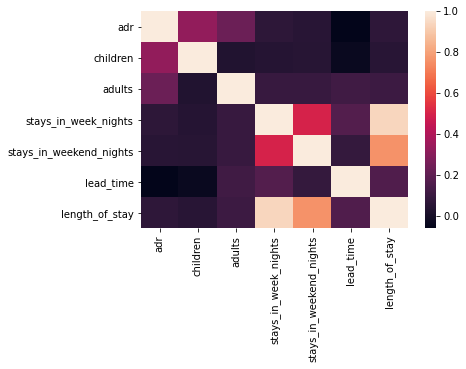

In [9]:
hotel_numeric=hotel_df[['adr', 'children', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'lead_time', 'length_of_stay']]
# hotel_numeric=hotel_df[['adults','lead_time']].describe()
correlation = hotel_numeric.corr()
sns.heatmap(correlation)

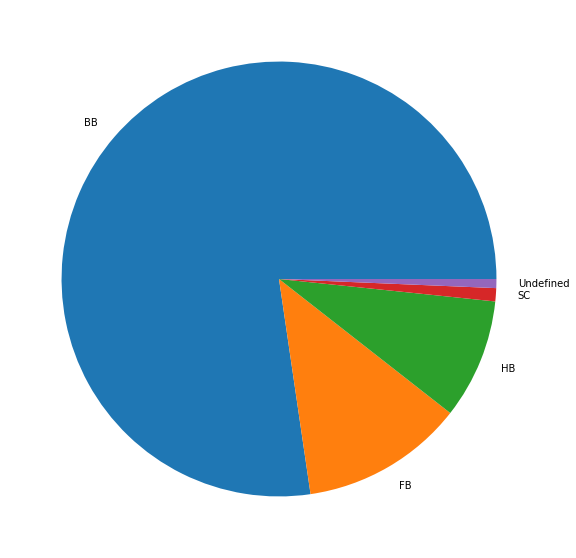

In [10]:
meal_types = hotel_df['meal'].unique()
size = hotel_df['meal'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(size, labels=meal_types)
plt.show()

Text(0, 0.5, 'Count')

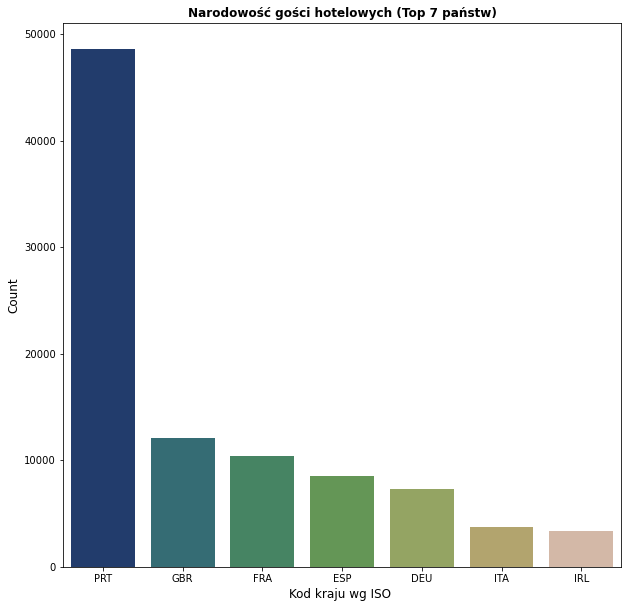

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotel_df,
              order=pd.value_counts(hotel_df['country']).iloc[:7].index, palette="gist_earth")
plt.title('Narodowość gości hotelowych (Top 7 państw)', weight='bold')
plt.xlabel('Kod kraju wg ISO ', fontsize=12)
plt.ylabel('Count', fontsize=12)
